<a href="https://colab.research.google.com/github/Jencinias/Ensemble-based-Traffic-Sign-Recognition-for-Enhanced-Automotive-Safety/blob/main/Road_sign_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Jonathan Encinias
#01/15/24

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import os
import cv2 as cv
from google.colab.patches import cv2_imshow

In [5]:
df = pd.read_csv("/content/drive/MyDrive/road_sign.csv")
print(df.head())

      filename  width  height         class  xmin  ymin  xmax  ymax
0    road0.png    267     400  trafficlight    98    62   208   232
1    road1.png    400     283  trafficlight   154    63   258   281
2   road10.png    400     267  trafficlight   106     3   244   263
3  road100.png    400     385    speedlimit    35     5   363   326
4  road101.png    400     200    speedlimit   195     7   392   194


In [6]:
counts = df["class"].value_counts()
print(counts)

speedlimit      652
crosswalk        88
stop             76
trafficlight     61
Name: class, dtype: int64


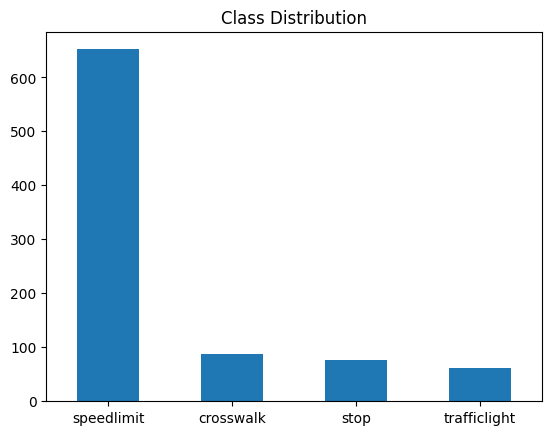

In [7]:
# create bar plot of counts
ax = counts.plot.bar(rot=0, title="Class Distribution")

In [8]:
images = os.listdir("drive/MyDrive/road_sign_images")
print(images)

['road120.png', 'road104.png', 'road112.png', 'road107.png', 'road122.png', 'road113.png', 'road12.png', 'road118.png', 'road105.png', 'road115.png', 'road121.png', 'road119.png', 'road109.png', 'road1.png', 'road110.png', 'road106.png', 'road11.png', 'road0.png', 'road111.png', 'road117.png', 'road116.png', 'road114.png', 'road10.png', 'road108.png', 'road100.png', 'road101.png', 'road123.png', 'road102.png', 'road103.png', 'road124.png', 'road149.png', 'road133.png', 'road162.png', 'road131.png', 'road160.png', 'road127.png', 'road135.png', 'road14.png', 'road151.png', 'road137.png', 'road142.png', 'road130.png', 'road146.png', 'road144.png', 'road129.png', 'road134.png', 'road147.png', 'road128.png', 'road159.png', 'road156.png', 'road157.png', 'road139.png', 'road125.png', 'road150.png', 'road163.png', 'road165.png', 'road154.png', 'road152.png', 'road143.png', 'road161.png', 'road15.png', 'road126.png', 'road158.png', 'road140.png', 'road164.png', 'road141.png', 'road138.png', 'ro

In [9]:
row = df.loc[df["filename"] == images[0]]
xmin = row["xmin"].values[0]
ymin = row["ymin"].values[0]
xmax = row["xmax"].values[0]
ymax = row["ymax"].values[0]
color = (0,255,0)
thickness = 2

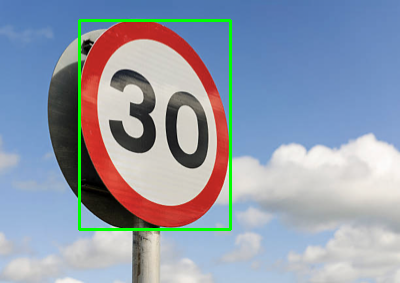

In [10]:
image = cv.imread(f"drive/MyDrive/road_sign_images/{images[0]}")
cv.rectangle(image, (xmin, ymin), (xmax, ymax), color=color, thickness=thickness)
cv2_imshow(image)

In [11]:
print(image.shape) #checking first image size

(283, 400, 3)


In [12]:
row = df.loc[df["filename"] == images[1]]
xmin = row["xmin"].values[0]
ymin = row["ymin"].values[0]
xmax = row["xmax"].values[0]
ymax = row["ymax"].values[0]
color = (0,255,0)
thickness = 2

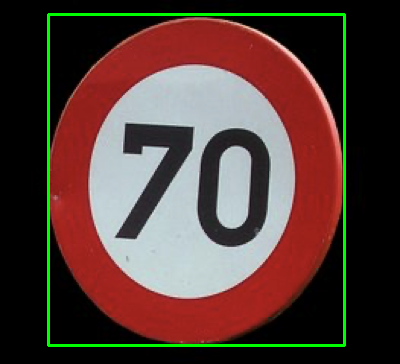

(364, 400, 3)


In [13]:
image1 = cv.imread(f"drive/MyDrive/road_sign_images/{images[1]}")
cv.rectangle(image1, (xmin, ymin), (xmax, ymax), color=color, thickness=thickness)

cv2_imshow(image1)
print(image1.shape) #second image size

In [14]:
row = df.loc[df["filename"] == images[1]]
xmin = row["xmin"].values[0]
ymin = row["ymin"].values[0]
xmax = row["xmax"].values[0]
ymax = row["ymax"].values[0]
color = (0,255,0)
thickness = 2

283 400


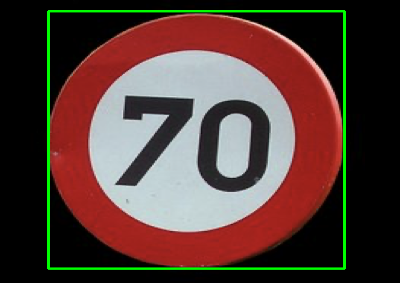

In [15]:
image1 = cv.imread(f"drive/MyDrive/road_sign_images/{images[1]}")
cv.rectangle(image1, (xmin, ymin), (xmax, ymax), color=color, thickness=thickness)

#Changes the second image to the same size as the first image
height, width = image.shape[:2]
print(height, width)
image1 = cv.resize(image1,(width, height), interpolation = cv.INTER_CUBIC)

cv2_imshow(image1)

# Continue exploring down sampling of the oversaturated classes.

In [24]:
#speedlimit      652
#crosswalk        88
#stop             76
#trafficlight     61

majority_class = df[df["class"] == counts.idxmax()]
cw_class = df[df["class"] == "crosswalk"]
stop_class = df[df["class"] == "stop"]
minority_class = df[df["class"] == counts.idxmin()]

desired_ratio = 0.5

downsampled_majority = majority_class.sample(n=int(len(minority_class)), random_state=42)
downsampled_cw = cw_class.sample(n=int(len(minority_class)), random_state=42)
downsampled_stop = stop_class.sample(n=int(len(minority_class)), random_state=42)


print(downsampled_majority.sample(frac=1).reset_index(drop=True))
print(downsampled_cw.sample(frac=1).reset_index(drop=True))
print(downsampled_stop.sample(frac=1).reset_index(drop=True))

       filename  width  height       class  xmin  ymin  xmax  ymax
0   road655.png    300     400  speedlimit    78   214    98   234
1   road174.png    300     400  speedlimit   154    83   198   132
2   road712.png    300     400  speedlimit    98   140   139   182
3   road214.png    300     400  speedlimit   127   166   145   185
4   road842.png    300     400  speedlimit    74   153   125   203
..          ...    ...     ...         ...   ...   ...   ...   ...
56  road502.png    300     400  speedlimit   222    78   298   177
57  road749.png    300     400  speedlimit    85   156   107   178
58  road296.png    300     400  speedlimit    62   214   114   273
59  road693.png    300     400  speedlimit    55   134   141   221
60  road421.png    300     400  speedlimit   116   160   195   239

[61 rows x 8 columns]
       filename  width  height      class  xmin  ymin  xmax  ymax
0   road583.png    300     400  crosswalk   218   230   250   265
1   road300.png    300     400  crosswalk

In [ ]:
selected_images=[]
image_directory = "drive/MyDrive/road_sign_images/"

for filename in images:

    if filename in downsampled_majority['filename'].values:

        row = downsampled_majority[downsampled_majority['filename'] == filename].iloc[0]


        image_path = image_directory + filename
        image = cv.imread(image_path)

        if image is not None:
            selected_images.append(image)

print(len(selected_images))
#for image in selected_images:
 #   cv2_imshow(image)
  #  cv.waitKey(0)
   # cv.destroyAllWindows()

61


In [25]:
balanced_df = pd.concat([downsampled_majority, downsampled_cw, downsampled_stop, minority_class])


balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

print(balanced_df)

        filename  width  height         class  xmin  ymin  xmax  ymax
0    road655.png    300     400    speedlimit    78   214    98   234
1    road300.png    300     400     crosswalk   134   117   205   218
2    road820.png    300     400  trafficlight    79   224    90   247
3    road434.png    300     400    speedlimit    98   232   146   280
4    road152.png    400     225     crosswalk   125    37   276   185
..           ...    ...     ...           ...   ...   ...   ...   ...
239   road27.png    267     400  trafficlight    89   157   118   226
240  road127.png    400     265     crosswalk   268    56   312   101
241  road582.png    300     400  trafficlight   185   228   201   270
242  road129.png    400     267     crosswalk   111    76   211   171
243  road223.png    300     400    speedlimit   137   165   159   187

[244 rows x 8 columns]


In [27]:
counts = balanced_df["class"].value_counts()
print(counts)

speedlimit      61
crosswalk       61
trafficlight    61
stop            61
Name: class, dtype: int64


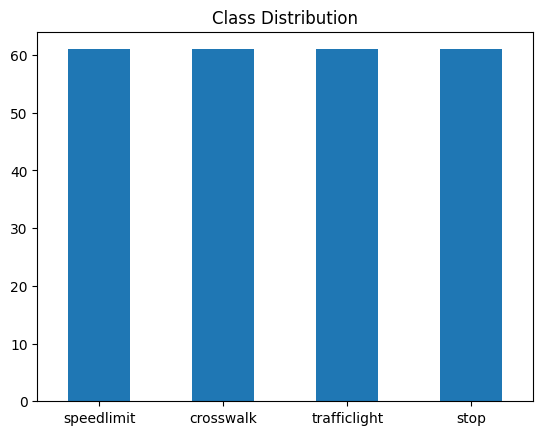

In [28]:
# create bar plot of counts
ax = counts.plot.bar(rot=0, title="Class Distribution")